# Parks & Recreation AI

Written by: Eric J. Puttock

Last Updated: 2020.09.04

Project Status: On-going.

- An attempt to create an artificial Leslie Knope (and other characters) using recurrent neural networks (RNNs).
- Uses transcripts from the television show Parks and Recreation (https://www.kaggle.com/heheheluke/parks-and-recreation-scripts).

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)

In [2]:
file_path = 'P&R_scripts\s{}e{}.csv'

In [3]:
import os.path
from os import path

def GetSeasonData(SeasonNumber):
    EpisodesMax = 100
    scripts_df= pd.DataFrame(columns = ['Character','Line'])
    for seasons in range (SeasonNumber,SeasonNumber+1):
        for episodes in range(1,EpisodesMax):
            if path.exists(file_path.format(seasons,'0'+str(episodes))):
                scripts_df = scripts_df.append(pd.read_csv(file_path.format(seasons,'0'+str(episodes))))
            elif path.exists(file_path.format(seasons,str(episodes))):
                scripts_df = scripts_df.append(pd.read_csv(file_path.format(seasons,str(episodes))))
            else:
                pass
    return scripts_df.reset_index(drop = True)

In [4]:
ParksDictionary = dict()
for SeasonNumber in range(1,8):
    SeasonName = 'Season {}'.format(str(SeasonNumber))
    ParksDictionary[SeasonName] = GetSeasonData(SeasonNumber)

In [5]:
ParksDictionary.keys()

dict_keys(['Season 1', 'Season 2', 'Season 3', 'Season 4', 'Season 5', 'Season 6', 'Season 7'])

In [6]:
ParksS1S7_df= pd.DataFrame(columns = ['Character','Line'])
for SeasonName, SeasonDF in ParksDictionary.items():
    ParksS1S7_df = ParksS1S7_df.append(SeasonDF)
ParksS1S7_df = ParksS1S7_df.reset_index(drop = True)    
ParksS1S7_df.shape

(65942, 2)

In [7]:
ParksDictionary['All'] = ParksS1S7_df

In [8]:
ParksDictionary.keys()

dict_keys(['Season 1', 'Season 2', 'Season 3', 'Season 4', 'Season 5', 'Season 6', 'Season 7', 'All'])

In [9]:
print(ParksS1S7_df.shape)
display(ParksS1S7_df.head())

(65942, 2)


Character  \
0  Leslie Knope   
1  Leslie Knope   
2  Leslie Knope   
3  Leslie Knope   
4  Leslie Knope   

                                                                                                  Line  
0                                                                                               Hello.  
1                                                                                                  Hi.  
2                         My name is Leslie Knope, and I work for the Parks and Recreation Department.  
3                                                                       Can I ask you a few questions?  
4  Would you say that you are, "Enjoying yourself and having fun, having a moderate amount of fun a...

In [10]:
# Import Pandas and NumPy
import pandas as pd
import numpy as np

# Import Keras, NLTK, String
import keras, nltk, string, re
# Preprocessing from Keras & NLTK
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
# Models
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM, Dropout

In [11]:
def word_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    return tokens

stopwords = nltk.corpus.stopwords.words('english')

def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

ParksS1S7_df['Words'] = ParksS1S7_df['Line'].apply(lambda x: word_text(x.lower()))
ParksS1S7_df['CLine'] = ParksS1S7_df['Line'].apply(lambda x: clean_text(x.lower()))
ParksS1S7_df.head()

Character  \
0  Leslie Knope   
1  Leslie Knope   
2  Leslie Knope   
3  Leslie Knope   
4  Leslie Knope   

                                                                                                  Line  \
0                                                                                               Hello.   
1                                                                                                  Hi.   
2                         My name is Leslie Knope, and I work for the Parks and Recreation Department.   
3                                                                       Can I ask you a few questions?   
4  Would you say that you are, "Enjoying yourself and having fun, having a moderate amount of fun a...   

                                                                                                 Words  \
0                                                                                              [hello]   
1                                                                                                 [hi]   
2            [my, name, is, leslie, knope, and, i, work, for, the, parks, and, recreation, department]   
3                                                                [can, i, ask, you, a, few, questions]   
4  [would, you, say, that, you, are, enjoying, yourself, and, having, fun, having, a, moderate, amo...   

                                                                                    CLine  
0                                                                                 [hello]  
1                                                                                    [hi]  
2                              [name, leslie, knope, work, parks, recreation, department]  
3                                                                        [ask, questions]  
4  [would, say, enjoying, fun, moderate, amount, fun, somewhat, enjoying, fun, enjoyment]

# Word Cloud of Parks and Recreation & Leslie Knope:

In [12]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    _ = plt.figure(figsize=(40, 30))
    # No axis details
    _ = plt.axis("off");
    # Display image
    plt.imshow(wordcloud) 
    
# Import package
from wordcloud import WordCloud, STOPWORDS

In [13]:
#! pip install wordcloud

In [14]:
#! pip install wikipedia

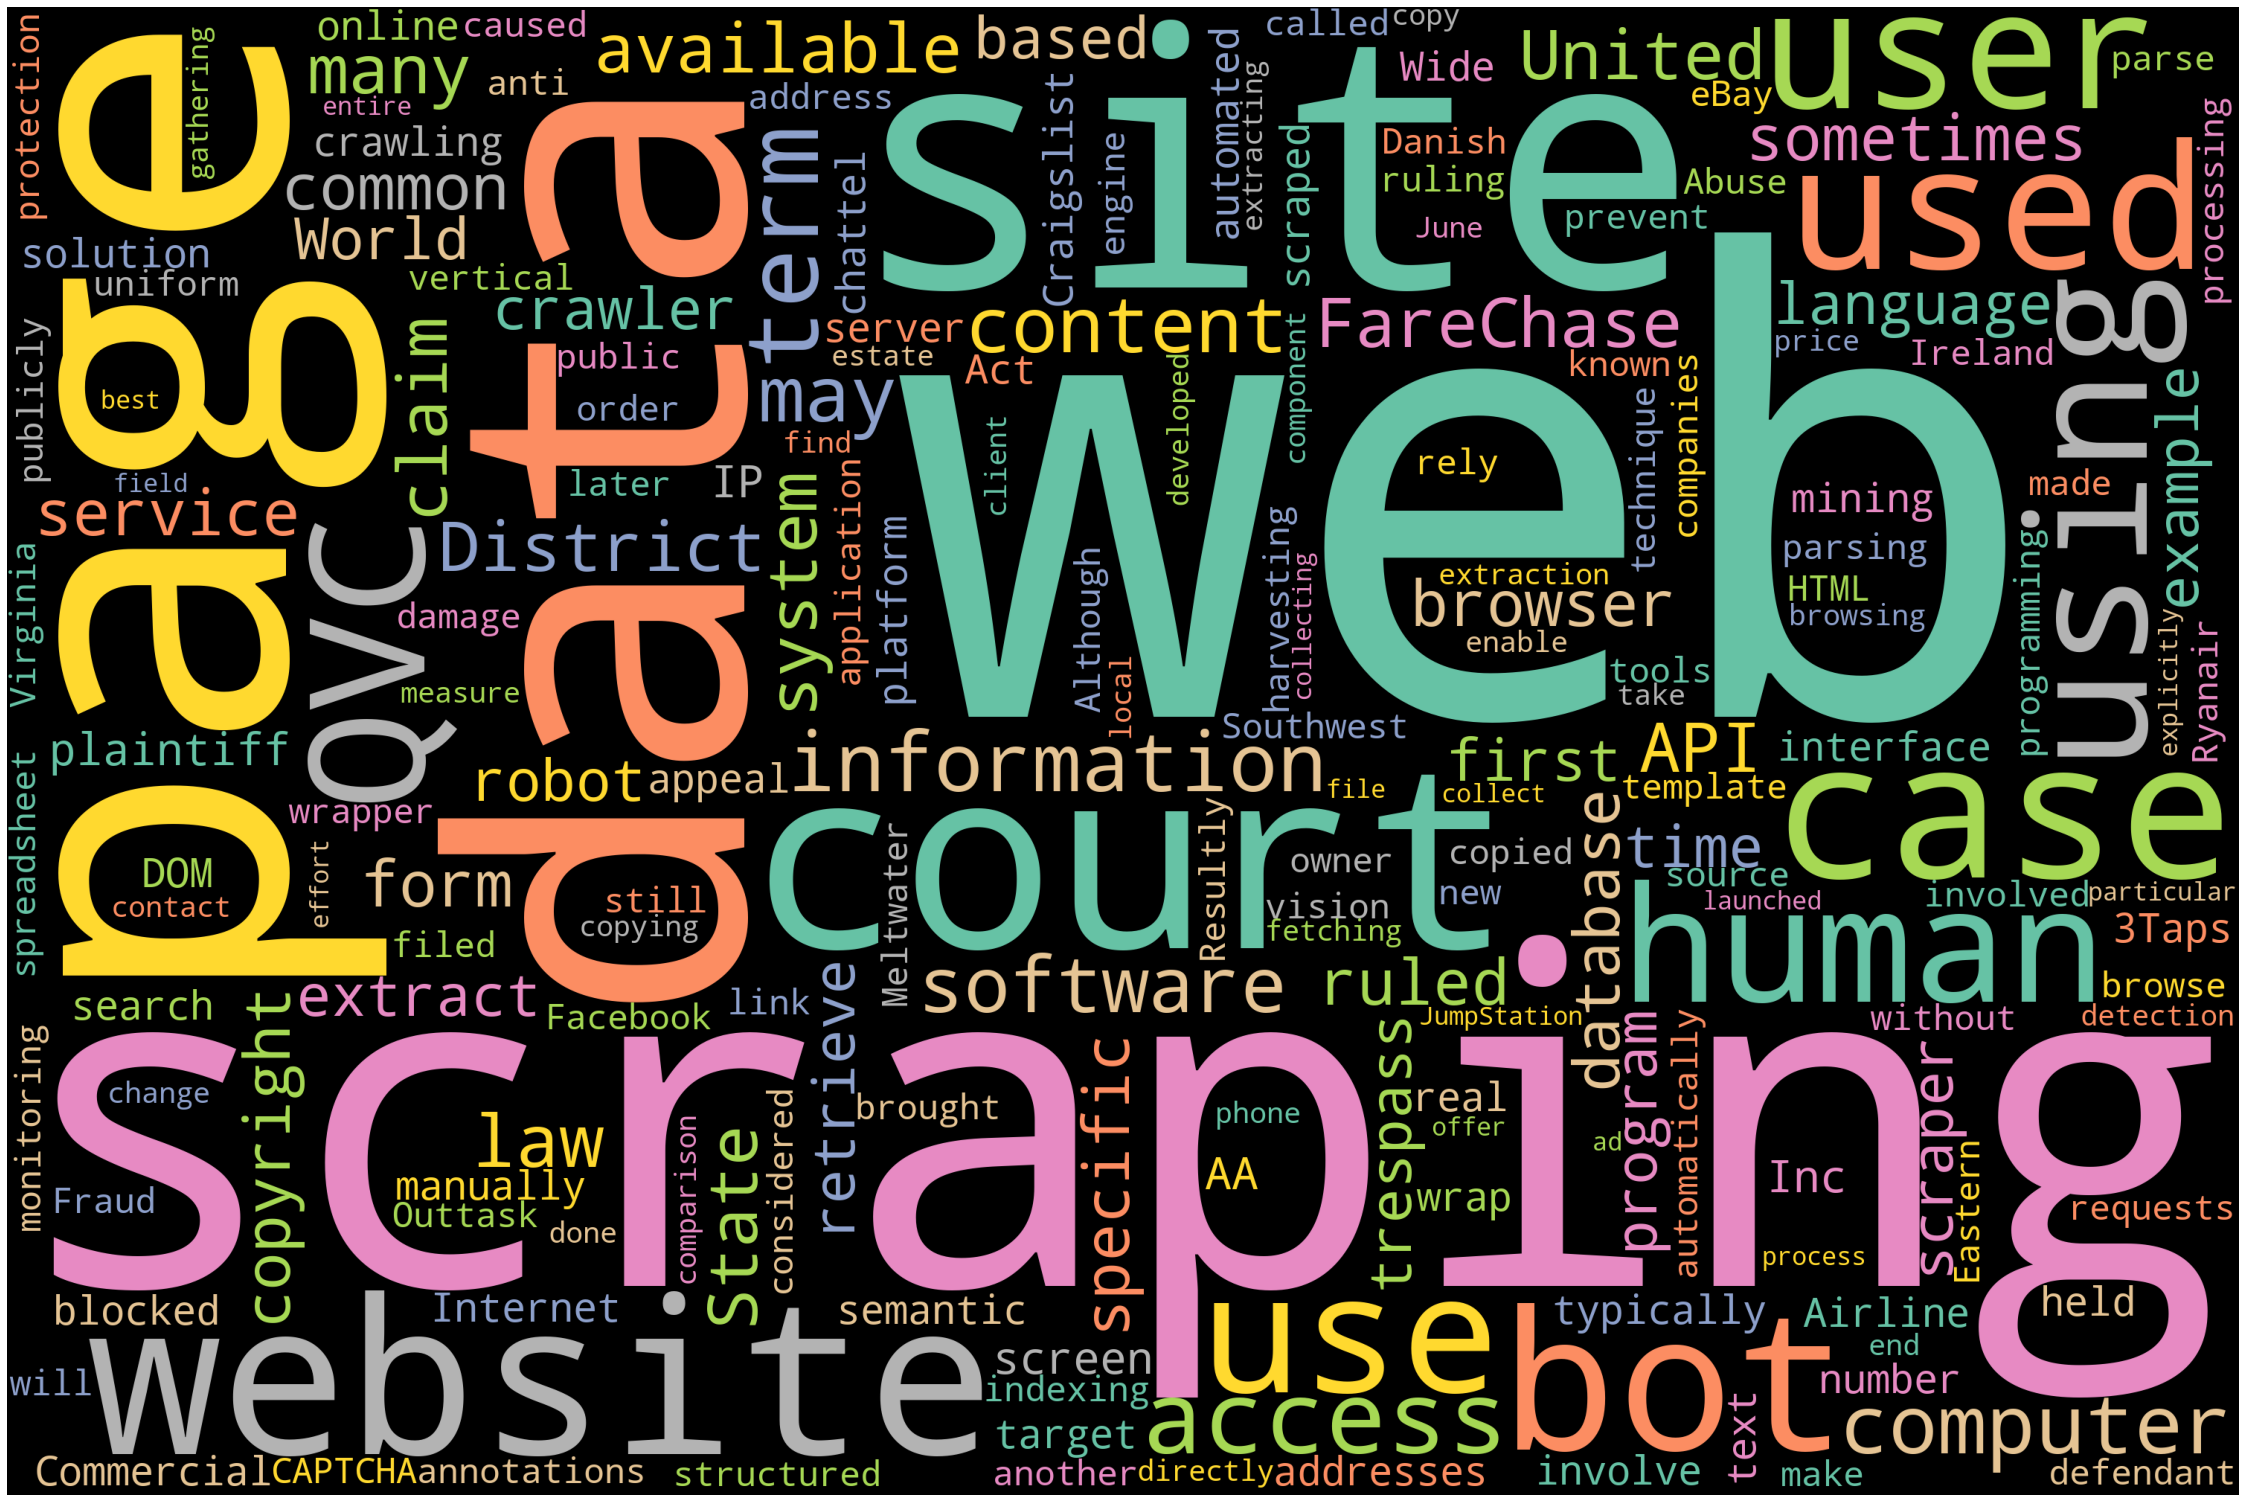

In [15]:
# Import packages
import wikipedia
import re
# Specify the title of the Wikipedia page
wiki = wikipedia.page('Web scraping')
# Extract the plain text content of the page
text = wiki.content
# Clean text
text = re.sub(r'==.*?==+', '', text)
text = text.replace('\n', '')
#print(text)
# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)

# Save image
#wordcloud.to_file("Wiki_WebScraping_wordcloud.png")

In [16]:
LKS17_df = ParksS1S7_df.query('Character == "Leslie Knope"').reset_index(drop = True)

In [17]:
TextPRS17 = ' '.join(rows for rows in ParksS1S7_df['Line'].values)

In [18]:
TextPRS17_clean = ' '.join(rows for rows in ParksS1S7_df['CLine'].agg('sum'))

In [19]:
TextLK = ' '.join(rows for rows in LKS17_df['Line'].values)

In [20]:
TextLK_clean = ' '.join(words for words in LKS17_df['CLine'].agg('sum'))

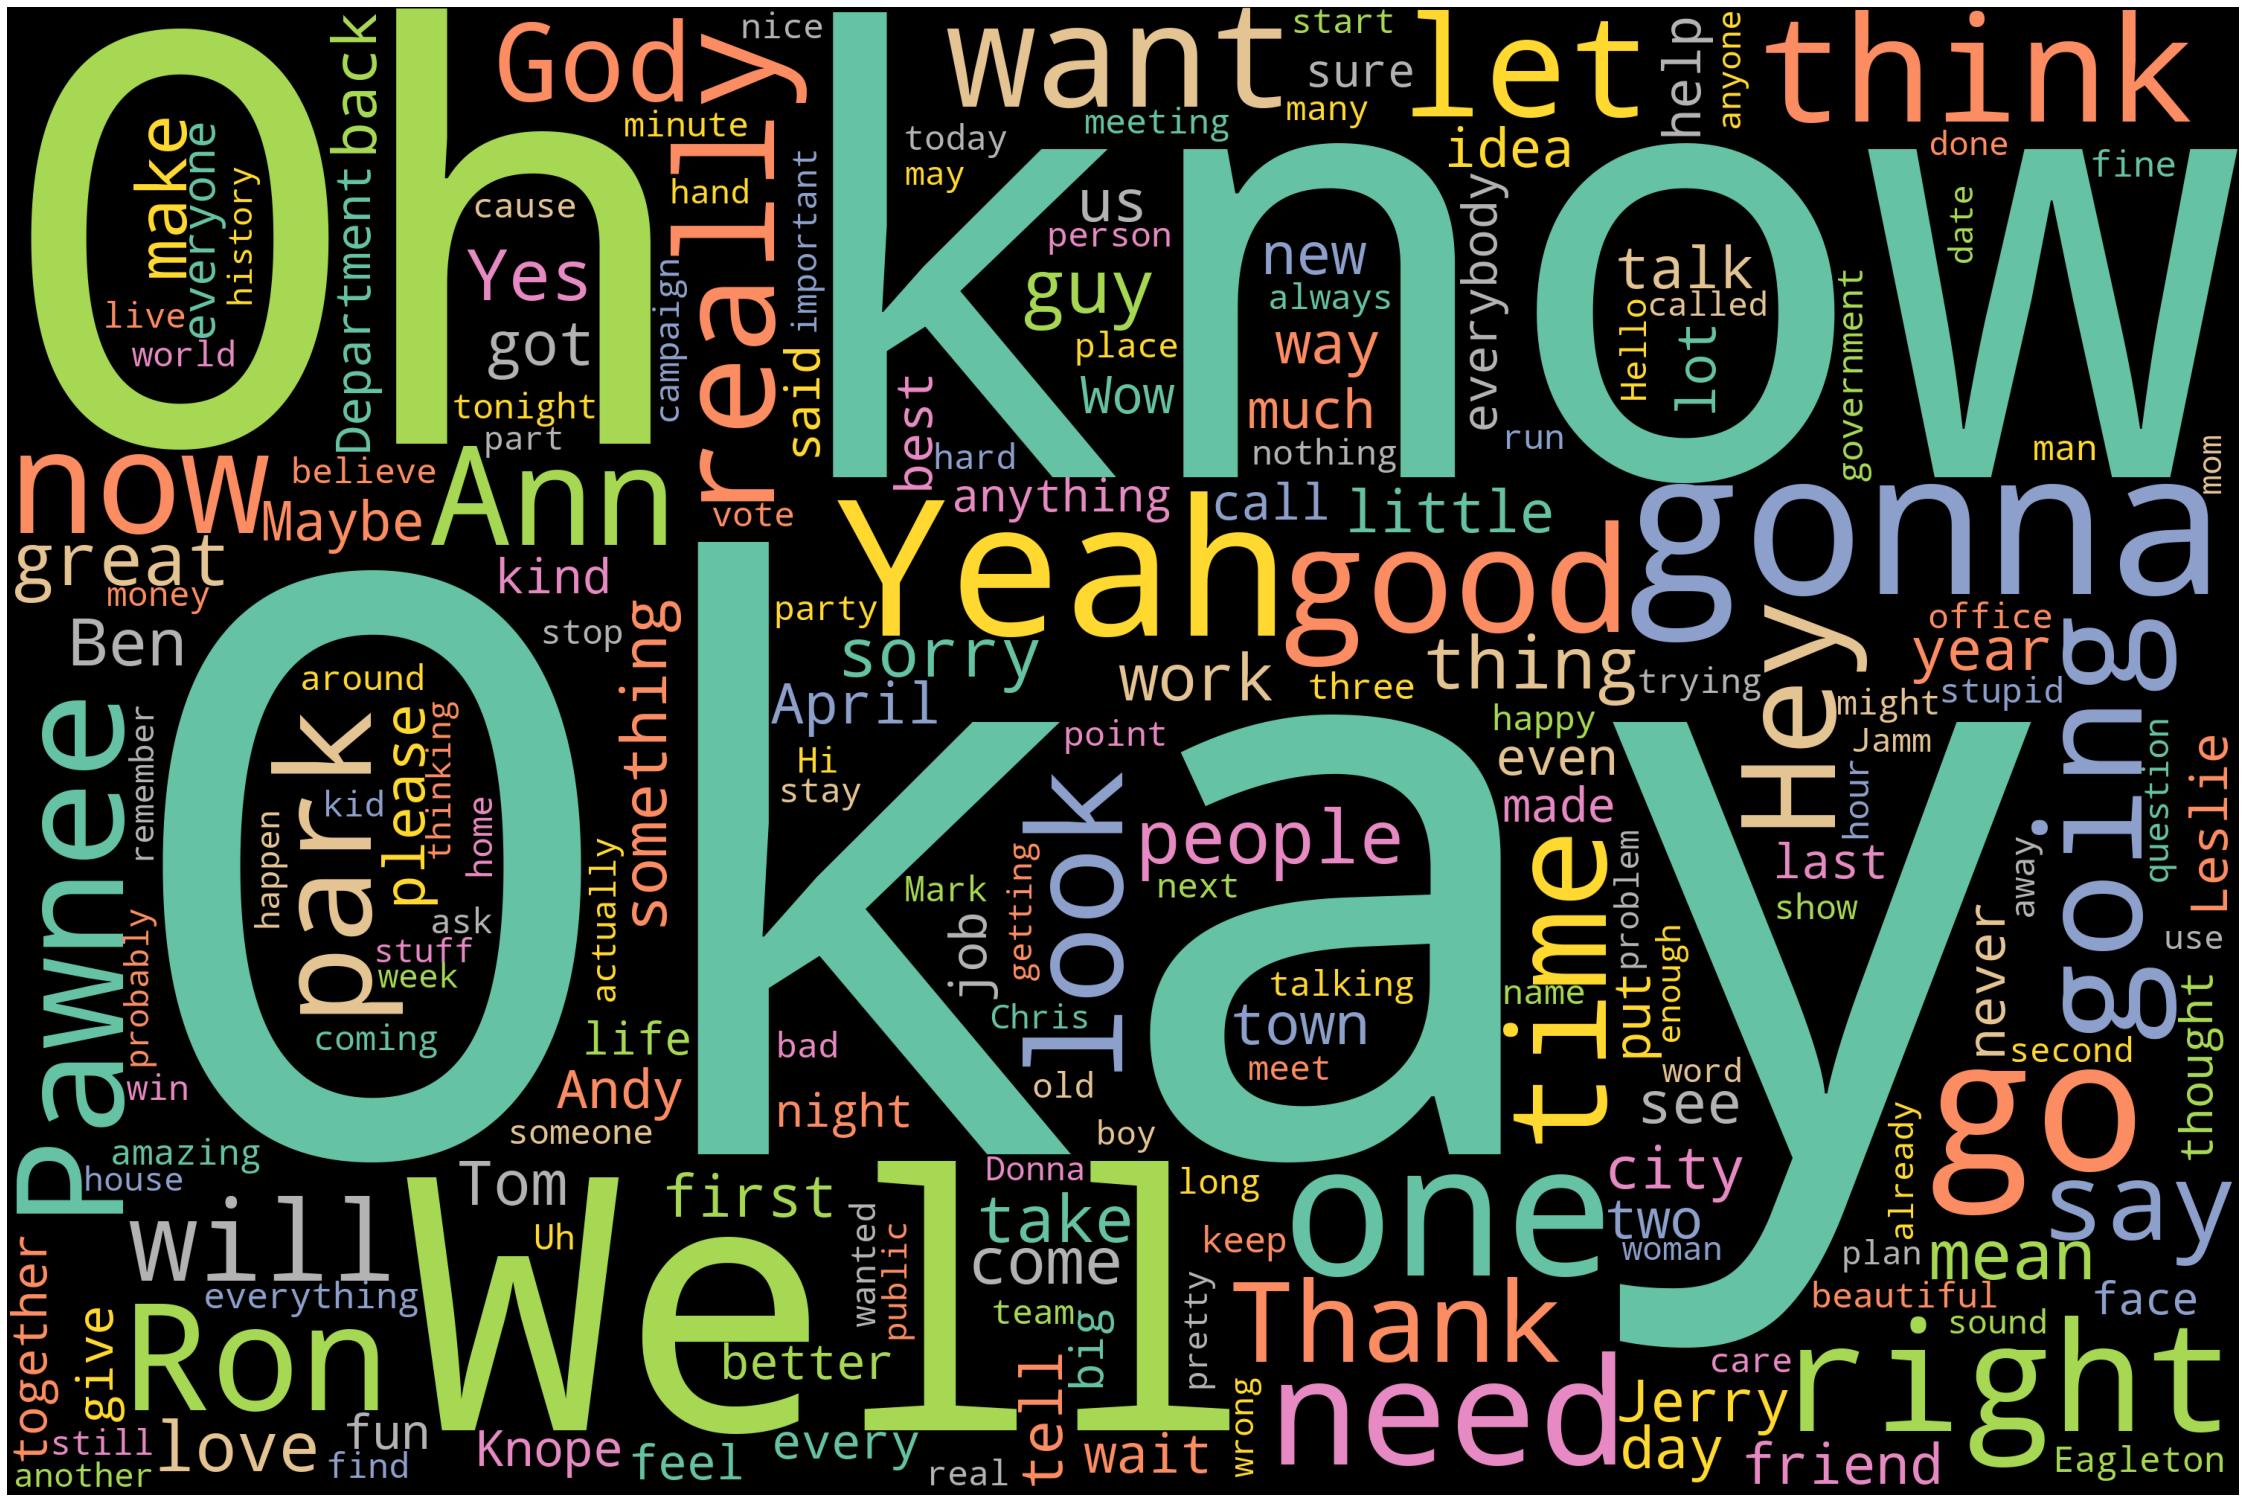

In [21]:
# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=42, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(TextLK)
# Plot
plot_cloud(wordcloud)

# Save image
#wordcloud.to_file("LK_WordCloud.png")

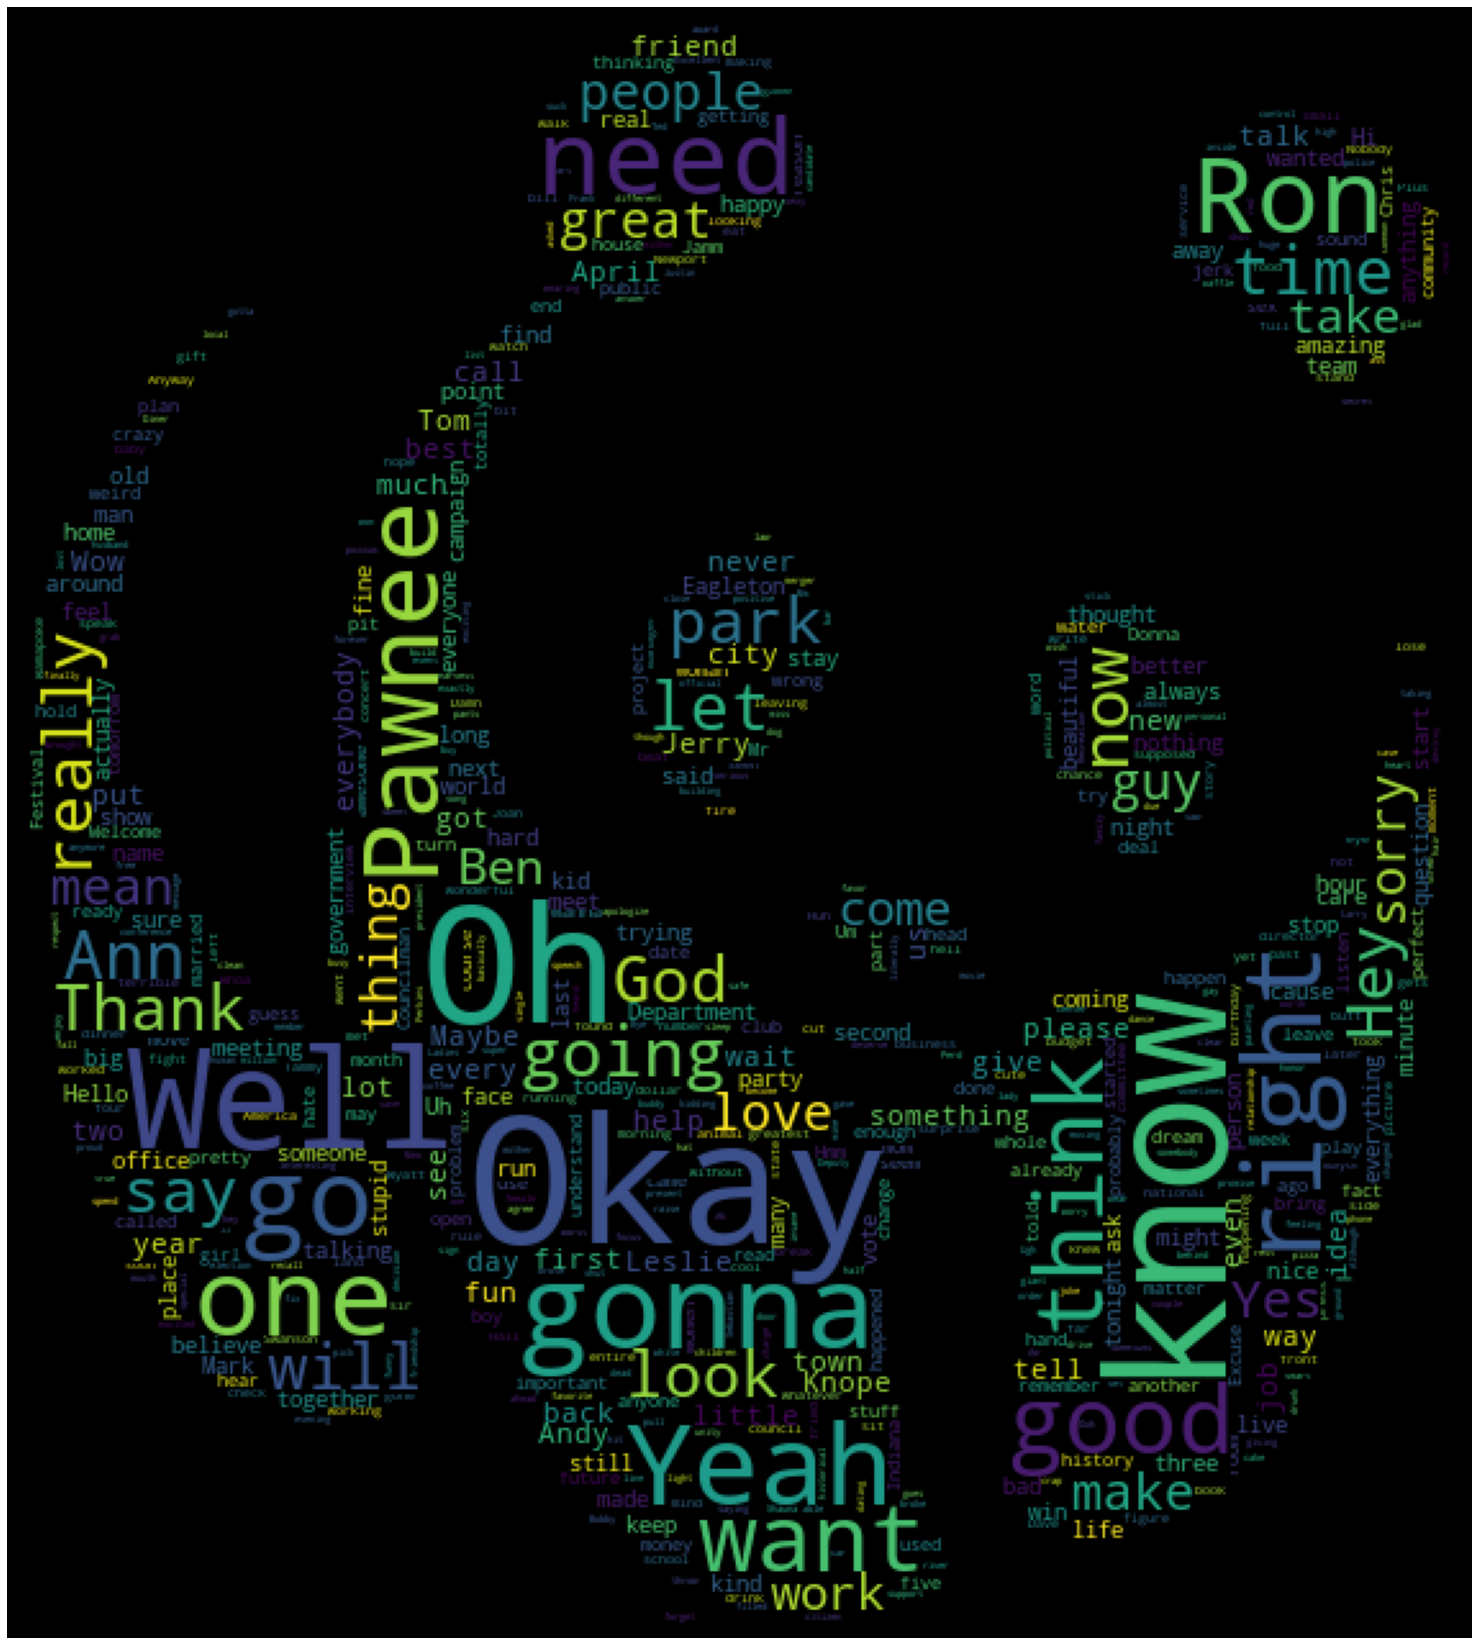

In [22]:
# Import packages
import numpy as np
from PIL import Image
# Import image to np.array
#mask = np.array(Image.open('pandax.png'))
mask = np.array(Image.open('WWF_pandas.jpg'))
#mask = np.array(Image.open('WWFPandas.png'))
# Generate wordcloud

wc = WordCloud(stopwords=STOPWORDS, #colormap='Set1',               
               collocations=False,
               mask=mask, background_color="black",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
#wc.generate(text)
wc.generate(TextLK)
#wc.generate(TextLK_clean)

# Plot
plot_cloud(wc)

# Save image
#wc.to_file("Panda_LK_WordCloud.png")

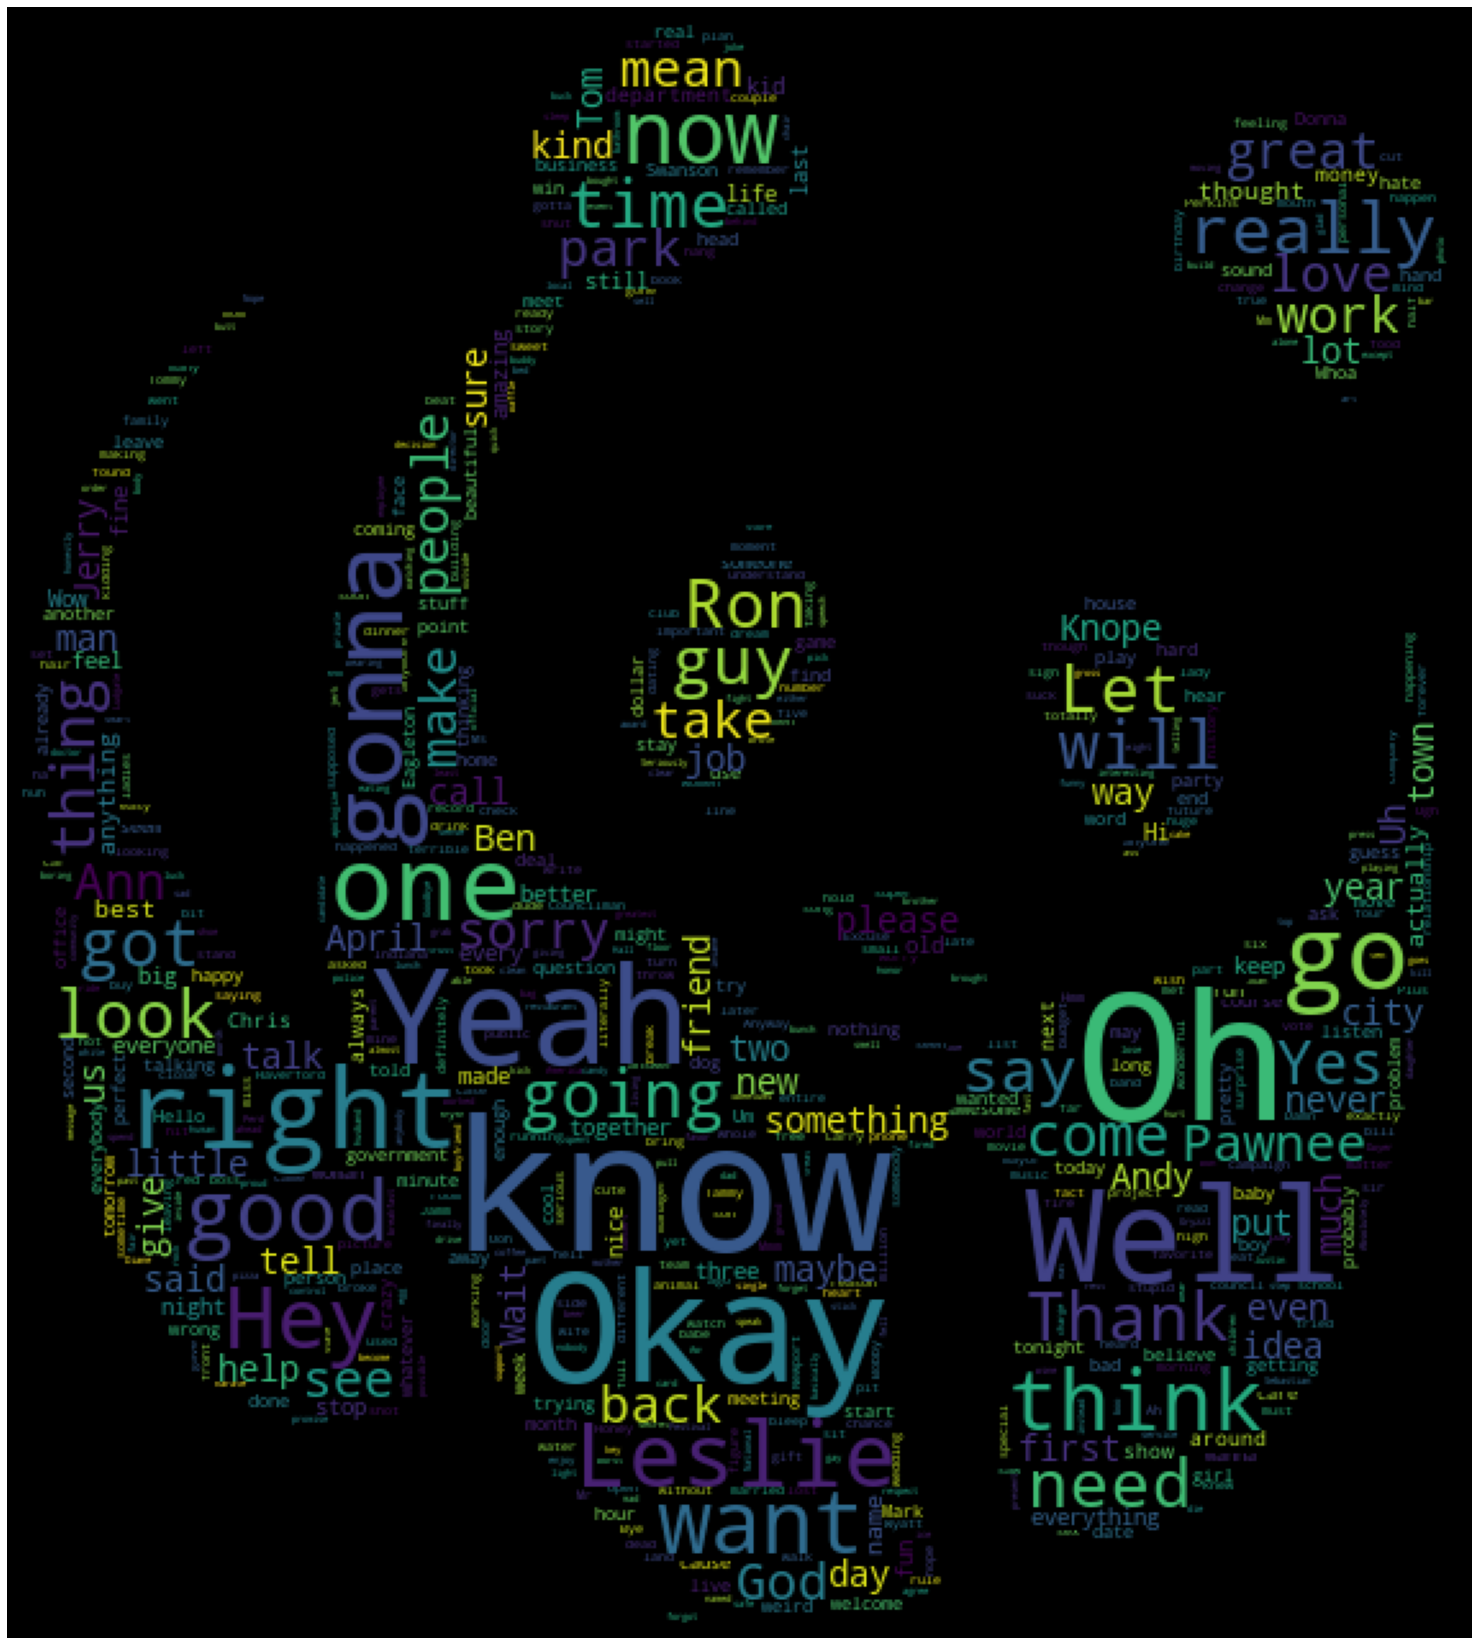

In [23]:
# Import packages
import numpy as np
from PIL import Image
# Import image to np.array
#mask = np.array(Image.open('pandax.png'))
mask = np.array(Image.open('WWF_pandas.jpg'))
#mask = np.array(Image.open('WWFPandas.png'))
# Generate wordcloud

wc = WordCloud(stopwords=STOPWORDS, #colormap='Set1',               
               collocations=False,
               mask=mask, background_color="black",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
#wc.generate(text)
wc.generate(TextPRS17)
#wc.generate(TextPRS17_clean)

# Plot
plot_cloud(wc)

# Save image
#wc.to_file("Panda_PRS17_WordCloud.png")

# Dataframe of all transcripts from Season 1 to Season 7:
- ParksS1S7_df : Dataframe containing Characters & Line, with additional columns of Words & CLine (STOP words from NLTK removed)
- LKS17_df : Leslie Knope's Dataframe containing Line, with additional columns of Words & CLine (STOP words from NLTK removed)

# Long string of all words combined
 - Text : Wikipedia Web Scraping
 - TextLK: All words from Season 1 to Season 7 by Leslie Knope
 - TextLK_clean : Removed some STOP words from NLTK by Leslie Knope
 - TextPRS17: All words from Season 1 to Season 7 by all cast members
 - TextPRS17_clean : Removed some STOP words from NLTK by all cast members

In [64]:
display(ParksS1S7_df.head())
print(TextPRS17[0:200])
print(TextPRS17_clean[0:200])

display(LKS17_df.head())
print(TextLK[0:200])
print(TextLK_clean[0:200])

Character  \
0  Leslie Knope   
1  Leslie Knope   
2  Leslie Knope   
3  Leslie Knope   
4  Leslie Knope   

                                                                                                  Line  \
0                                                                                               Hello.   
1                                                                                                  Hi.   
2                         My name is Leslie Knope, and I work for the Parks and Recreation Department.   
3                                                                       Can I ask you a few questions?   
4  Would you say that you are, "Enjoying yourself and having fun, having a moderate amount of fun a...   

                                                                                                 Words  \
0                                                                                              [hello]   
1                                                                                                 [hi]   
2            [my, name, is, leslie, knope, and, i, work, for, the, parks, and, recreation, department]   
3                                                                [can, i, ask, you, a, few, questions]   
4  [would, you, say, that, you, are, enjoying, yourself, and, having, fun, having, a, moderate, amo...   

                                                                                    CLine  
0                                                                                 [hello]  
1                                                                                    [hi]  
2                              [name, leslie, knope, work, parks, recreation, department]  
3                                                                        [ask, questions]  
4  [would, say, enjoying, fun, moderate, amount, fun, somewhat, enjoying, fun, enjoyment]

Hello. Hi. My name is Leslie Knope, and I work for the Parks and Recreation Department. Can I ask you a few questions? Would you say that you are, "Enjoying yourself and having fun, having a moderate 
hello hi name leslie knope work parks recreation department ask questions would say enjoying fun moderate amount fun somewhat enjoying fun enjoyment im gonna put lot fun ms knope theres drunk stuck sl


Character  \
0  Leslie Knope   
1  Leslie Knope   
2  Leslie Knope   
3  Leslie Knope   
4  Leslie Knope   

                                                                                                  Line  \
0                                                                                               Hello.   
1                                                                                                  Hi.   
2                         My name is Leslie Knope, and I work for the Parks and Recreation Department.   
3                                                                       Can I ask you a few questions?   
4  Would you say that you are, "Enjoying yourself and having fun, having a moderate amount of fun a...   

                                                                                                 Words  \
0                                                                                              [hello]   
1                                                                                                 [hi]   
2            [my, name, is, leslie, knope, and, i, work, for, the, parks, and, recreation, department]   
3                                                                [can, i, ask, you, a, few, questions]   
4  [would, you, say, that, you, are, enjoying, yourself, and, having, fun, having, a, moderate, amo...   

                                                                                    CLine  
0                                                                                 [hello]  
1                                                                                    [hi]  
2                              [name, leslie, knope, work, parks, recreation, department]  
3                                                                        [ask, questions]  
4  [would, say, enjoying, fun, moderate, amount, fun, somewhat, enjoying, fun, enjoyment]

Hello. Hi. My name is Leslie Knope, and I work for the Parks and Recreation Department. Can I ask you a few questions? Would you say that you are, "Enjoying yourself and having fun, having a moderate 
hello hi name leslie knope work parks recreation department ask questions would say enjoying fun moderate amount fun somewhat enjoying fun enjoyment im gonna put lot fun sir childrens slide youre allo


In [14]:
# Build the dictionary of indexes
tokenizer = Tokenizer(num_words=None, 
                     filters='#$%&()*+-<=>@[\\]^_`{|}~\t\n',
                     lower = False, split = ' ')
tokenizer.fit_on_texts(LeslieDF['Line'])

# Change texts into sequence of indexes
sequences = tokenizer.texts_to_sequences(LeslieDF['Line'])

In [15]:
# Create look-up dictionaries and reverse look-ups
word_idx = tokenizer.word_index
idx_word = tokenizer.index_word
num_words = len(word_idx) + 1
word_counts = tokenizer.word_counts

print(f'There are {num_words} unique words.')
    
    
print(' '.join(idx_word[w] for w in sequences[2][:100]))
print(sequences[2][:100])

There are 16116 unique words.
My name is Leslie Knope, and I work for the Parks and Recreation Department.
[232, 418, 7, 200, 510, 6, 1, 156, 13, 2, 180, 6, 2064, 956]


In [16]:
len(idx_word.keys())

16115

In [17]:
features = []
labels = []

training_length = 10

# Iterate through the sequences of tokens
for seq in sequences:

    # Create multiple training examples from each sequence
    for i in range(training_length, len(seq)):
        
        # Extract the features and label
        extract = seq[i - training_length:i + 1]

        # Set the features and label
        features.append(extract[:-1])
        labels.append(extract[-1])
        
features = np.array(features)

In [18]:
features.shape, len(labels)

((24133, 10), 24133)

In [19]:
' '.join(idx_word[w] for w in features[10][:100])

'"Enjoying yourself and having fun, having a moderate amount of'

In [20]:
print(idx_word[labels[10]])

fun


In [21]:
# Number of words in vocabulary
num_words = len(idx_word)+1

# Empty array to hold labels
label_array = np.zeros((len(features), num_words), dtype = np.int8)

# One hot encode the labels
for example_index, word_index in enumerate(labels):
    label_array[example_index, word_index] = 1

label_array.shape

(24133, 16116)

In [48]:
idx_word[np.argmax(label_array[100])]

'location'

In [56]:
# File Location:
#glove_vectors = 'glove.6B.50d.txt'
glove_vectors = 'glove.6B.100d.txt'
#glove_vectors = 'glove.6B.200d.txt'
#glove_vectors = 'glove.6B.300d.txt'

# Load in embeddings
word2vec = dict()
with open(glove_vectors, 'r', encoding = "utf-8") as f:
  # is just a space-separated text file in the format:
  # word vec[0] vec[1] vec[2] ...
    for line in f:
        values = line.split() #split at space
        word = values[0]
        vec = np.asarray(values[1:], dtype='float32') #numpy.asarray()function is used when we want to convert input to an array.
        word2vec[word] = vec
print('Found %s word vectors.' % len(word2vec))

Found 400000 word vectors.


In [57]:
word2vec['park']

array([ 0.15131  ,  0.20984  ,  0.44375  ,  0.45195  , -0.0043544,
        0.059595 , -0.042164 ,  1.2808   , -0.19498  , -0.61939  ,
        0.1575   ,  0.35017  , -0.32717  , -0.68795  ,  0.78764  ,
        0.037724 ,  1.7431   ,  0.82151  , -1.1059   , -0.14745  ,
        0.57415  ,  0.3349   ,  0.23983  , -0.34719  ,  0.14589  ,
        0.28419  , -0.53824  , -0.10962  , -0.86679  ,  0.2112   ,
       -0.77555  ,  0.60821  ,  0.59643  ,  0.67263  ,  0.3666   ,
        0.17924  , -0.17827  ,  0.63698  , -0.39038  , -0.44531  ,
        0.12702  , -0.33803  , -0.21535  , -0.3475   ,  1.1522   ,
        0.53329  ,  0.43615  ,  0.17916  ,  0.42088  , -0.10529  ,
       -0.20622  , -1.4166   ,  0.18713  ,  0.17926  ,  0.32143  ,
       -2.7042   , -0.27784  , -0.044089 ,  1.2214   ,  0.18721  ,
       -0.59309  ,  0.84205  ,  0.69952  ,  0.20318  ,  0.43794  ,
        0.10392  ,  0.74509  ,  0.20895  ,  0.47166  ,  0.39459  ,
       -0.45606  ,  0.083576 , -0.32574  , -1.3513   ,  0.2806

In [58]:
print(len(word2vec.keys()), len(word2vec['park']))

400000 100


In [59]:
# Create lookup of words to vectors
word_lookup = word2vec.copy()
num_words = len(word2vec)
vec_length = len(word2vec['park'])

# New matrix to hold word embeddings
embedding_matrix = np.zeros((num_words, vec_length))

for i, word in enumerate(word_idx.keys()):
    # Look up the word embedding
    vector = word_lookup.get(word, None)

    # Record in matrix
    if vector is not None:
        embedding_matrix[i + 1, :] = vector

In [60]:
embedding_matrix.shape

(400000, 100)

In [100]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Create callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=5), ModelCheckpoint('model.h5', save_best_only=True, save_weights_only=False)]

model = Sequential()

# Embedding layer
model.add(
    Embedding(input_dim=num_words,
              input_length = training_length,
              output_dim=vec_length,
              weights=[embedding_matrix],
              trainable=False,
              mask_zero=True))

# Masking layer for pre-trained embeddings
model.add(Masking(mask_value=0.0))

# Recurrent layer
model.add(LSTM(64, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1))

# Fully connected layer
model.add(Dense(64, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_words, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# This is where I am at the moment with this project.
- Notebook will be cleaned up, updated, and pushed further when possible.